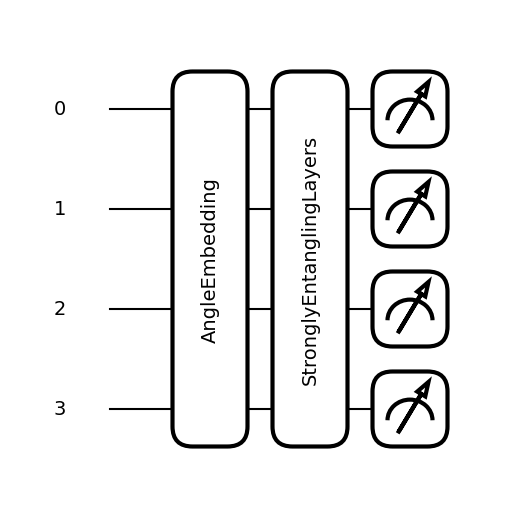

In [7]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

def create_device(n_qubits):
    return qml.device("default.qubit", wires=n_qubits)

def quantum_circuit(inputs, weights, n_qubits):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

def visualize_circuit(n_qubits, n_layers):
    dev = create_device(n_qubits)
    
    @qml.qnode(dev)
    def circuit(inputs, weights):
        return quantum_circuit(inputs, weights, n_qubits)
    
    inputs = np.random.random(n_qubits)
    weights = np.random.random((n_layers, n_qubits, 3))
    
    qml.draw_mpl(circuit)(inputs, weights)
    plt.show()

n_qubits = 4
n_layers = 1
visualize_circuit(n_qubits, n_layers)
